## Optimización por enjambre de particulas (PSO)


La Optimización por Enjambre de Partículas (Particle Swarm Optimization, PSO) es un algoritmo de optimización metaheurística (Las metaheurísticas son técnicas de optimización que se utilizan para resolver problemas complejos de búsqueda y optimización en los que los métodos tradicionales pueden ser ineficaces o poco prácticos. Estas técnicas proporcionan soluciones aproximadas para encontrar soluciones cercanas a óptimos globales en problemas difíciles.

Las metaheurísticas se caracterizan por su generalidad y flexibilidad, ya que no están diseñadas para un problema específico, sino que se aplican a una amplia gama de problemas de optimización. Algunas de las metaheurísticas más conocidas incluyen) inspirado en el comportamiento social y la interacción entre individuos en un enjambre, como un grupo de aves o peces. Fue investigado por Russel Eberhart y James Kennedy en 1995 mientras estudiaban un módelo para describir el comportamiento social de animales en grupo, pero terminaron encontrando que esta solución podía modelarse para solucionar diversos problemas de optimización. Este algoritmo se utiliza para encontrar soluciones aproximadas a problemas de optimización en diversas áreas de la ingeniería, la informática, la robótica entre otras; y usada en disciplinas como Aprendizaje Automático, Computación en Malla, Manejo de Datos e Investigación de Operaciones. Aquí hay una breve explicación de cómo funciona:

1. **Partículas:** En el contexto de PSO, las "partículas" son soluciones candidatas al problema de optimización. Cada partícula se representa en un espacio de búsqueda multidimensional, donde cada dimensión corresponde a una variable en el problema.

2. **Posición y Velocidad:** Cada partícula tiene una posición en el espacio de búsqueda y una velocidad asociada. La posición de una partícula representa una posible solución al problema, y la velocidad determina cómo se mueve la partícula a través del espacio de búsqueda.

3. **Mejor Posición Personal (pbest):** Cada partícula realiza un seguimiento de su mejor posición personal, es decir, la mejor solución que ha encontrado hasta el momento.

4. **Mejor Posición Global (gbest):** El algoritmo también realiza un seguimiento de la mejor posición global encontrada por cualquier partícula en el enjambre.

5. **Actualización de Posición y Velocidad:** En cada iteración del algoritmo, las partículas ajustan su velocidad y posición en función de su experiencia personal (pbest) y de la experiencia del enjambre (gbest). Esto les permite moverse hacia soluciones prometedoras en el espacio de búsqueda.

El proceso de búsqueda continúa iterativamente hasta que se alcanza un cierto criterio de parada, como un número máximo de iteraciones o una solución aceptable.

PSO se utiliza para encontrar soluciones aproximadas a problemas de optimización, como la optimización de funciones matemáticas, el diseño de sistemas, la planificación de rutas y muchas otras aplicaciones. Su simplicidad y su capacidad para explorar eficazmente el espacio de búsqueda lo convierten en una herramienta útil en el campo de las metaheurísticas y las heurísticas.

El éxito del algoritmo PSO depende de la configuración de parámetros, la elección de la función objetivo y la naturaleza del problema en cuestión. En muchos casos, PSO puede converger hacia soluciones de alta calidad, pero su rendimiento puede variar en función de la complejidad del problema y la configuración del algoritmo.

## Módelo matemático

Aquí podemos observar todas las variables que influyen en el movimiento de una particula en nuestra solución. Cada particula tiene una posición Xi(t) y tiene asociado un vector de velocidad Vi(t) a dicha posición, además también tiene asociados dos puntos importantes: Pi(t) que denota la mejor experiencia o mejor solución propia de la particula, y se asocia con la posición de la particula con el vector Pi(t) - Xi(t); por otra parte, g(t) denota la mejor experiencia o solución encontrada de entre todas las particulas de nuestro enjambre y se asocia con la posición actual de la particula mediante el vector g(t) - Xi(t).

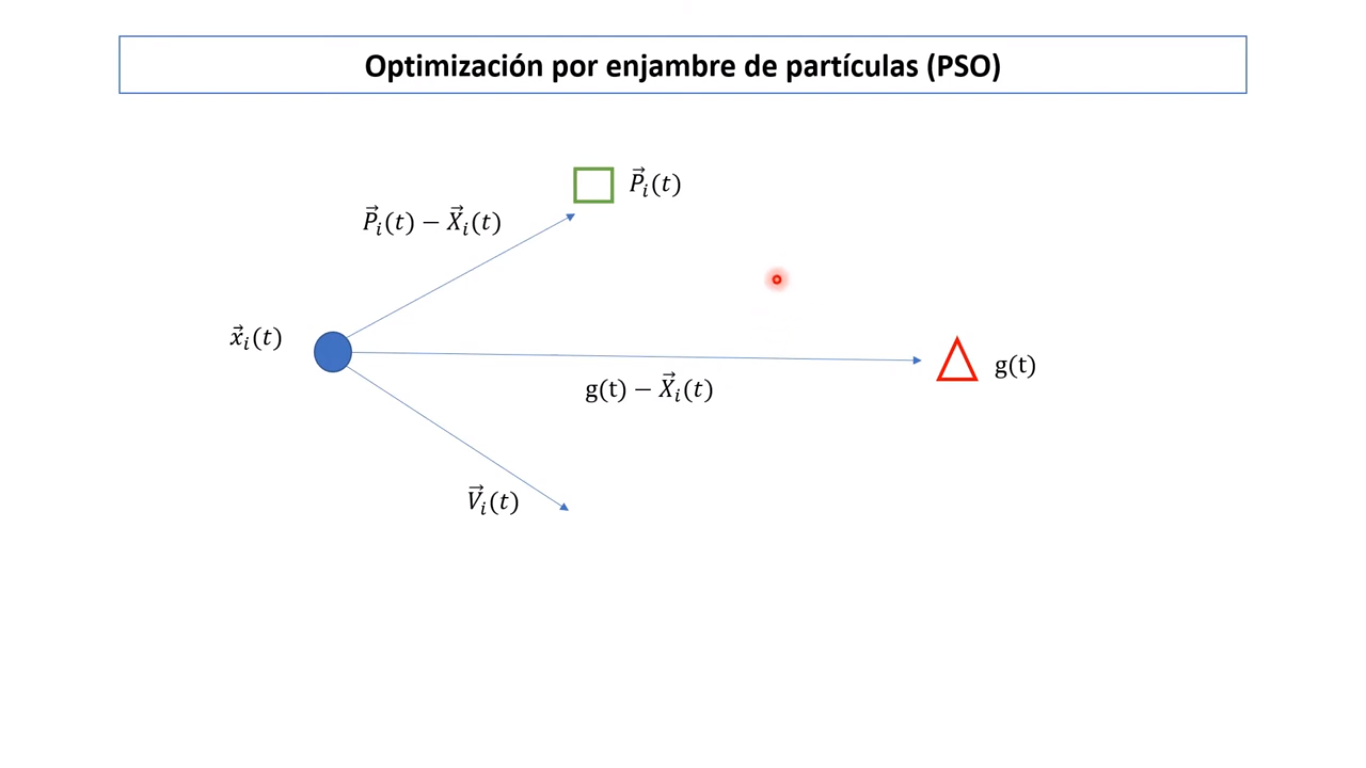

Estos tres vectores influyen a la hora de encontra la posición Xi(t+1) de la particula, y la forma en que la particula encuentra su camino a la posición siguiente es moviendose un poco de forma paralela a cada uno de tres vectores, osease, primero se mueve de forma paralela al vector Vi(t) una fracción de su longitud, luego de forma paralela a Pi(t)-Xi(t) una fracción de su longitud, y por último se mueve de forma paralela al vector g(t)-Xi(t) una fracción de su longitud, de forma que el nuevo Xi(t) está mejor posicionado con relación a la mejor solución global encontrada y la mejor solución propia encontrada, además del factor de movimiento que ya le proporciona su vector Vi(t)

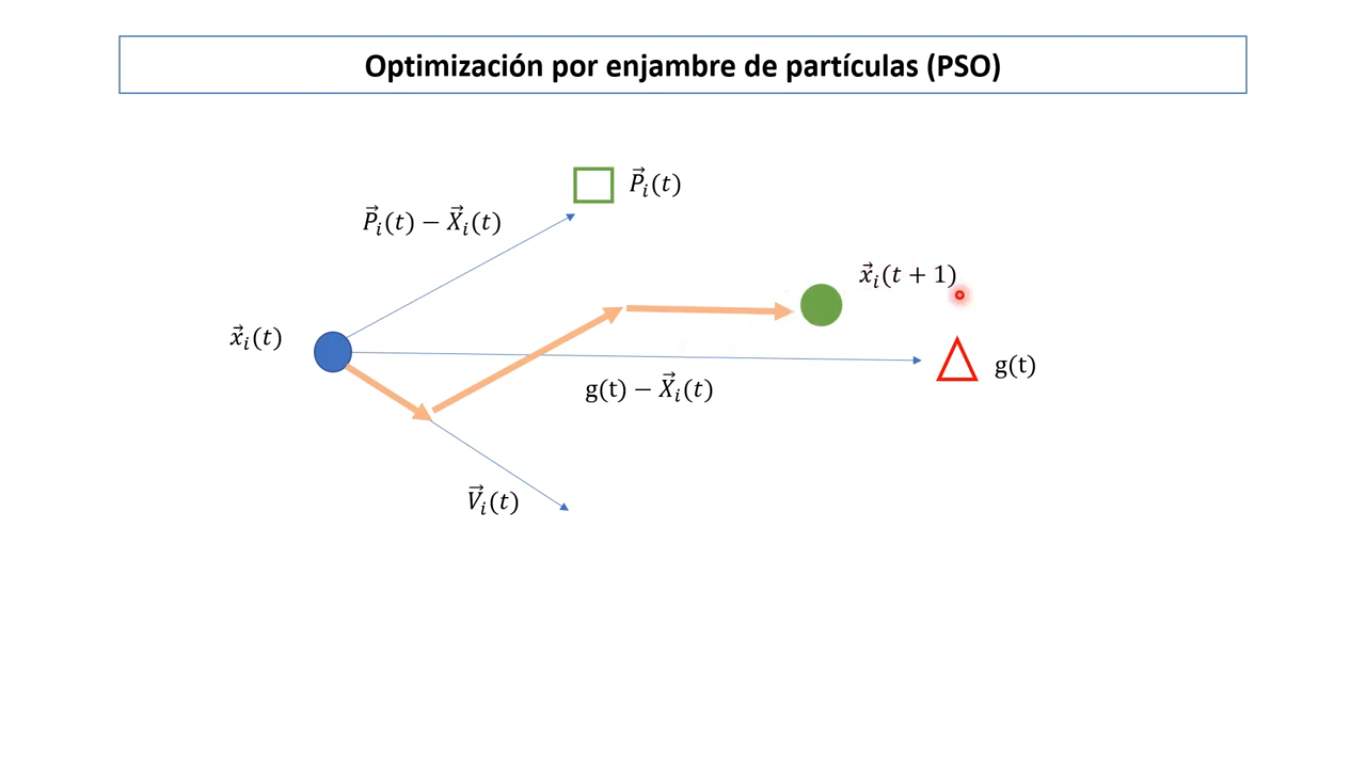

El camino que siguió la particula hasta Xi(t+1) se relaciona directamente con el nuevo vector velocidad Vi(t+1) que tendrá en su nueva posición, lo cual hace sentido al comportamiento real que debería tener una particula con dicho movimiento.

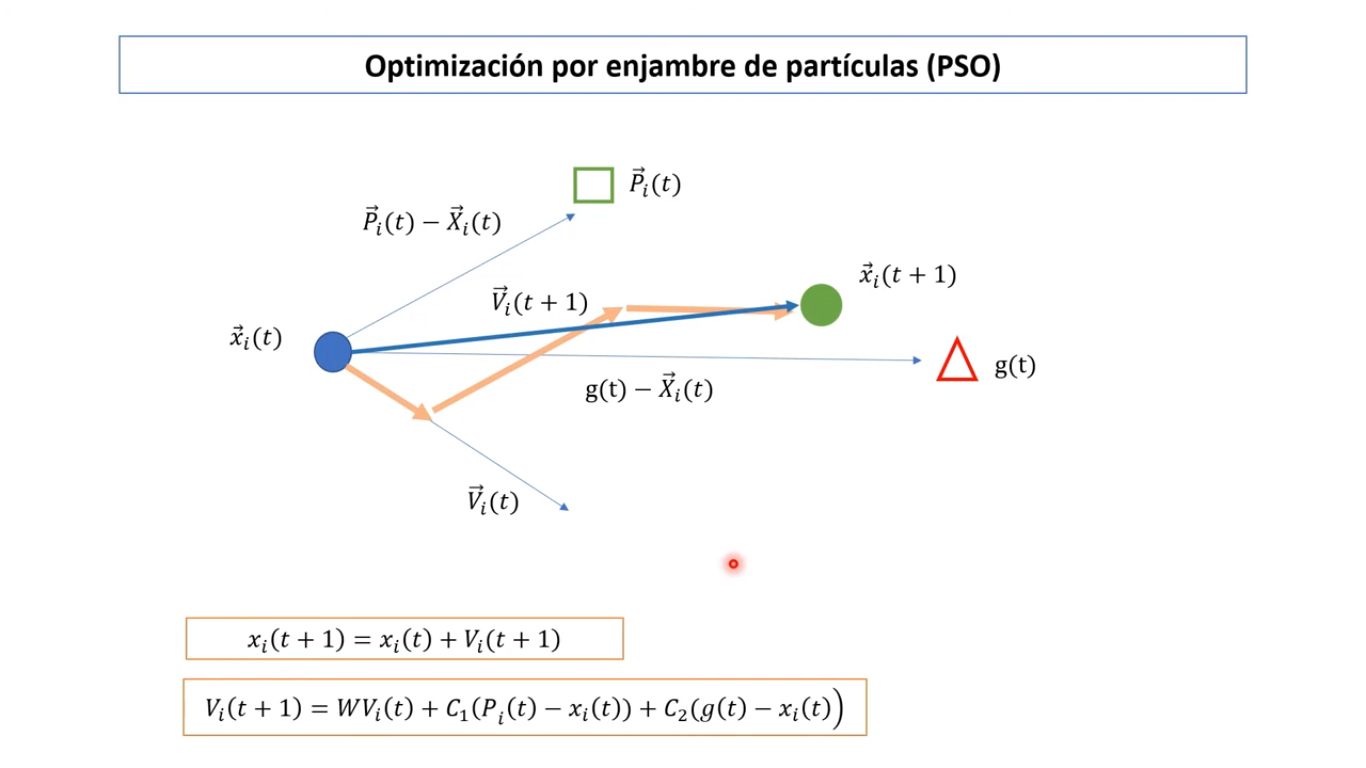

De forma matemática:
- Xi(t+1) = Xi(t) + Vi(t+1): La nueva posición de cada particula será la suma de su posición actual más el nuevo vector velocidad que hemos calculado y que estará influenciado por la velocidad actual, la mejor experiencia propia y la mejor experiencia global.
- Vi(t+1) = W*Vi(t) + C1*R1*(Pi(t) - Xi(t)) + C2*R2*(g(t) - Xi(t))
- W: Se conoce como el factor de inercia y nos permite darle un "peso" a la velocidad y dirección con la que viaja la particula actualmente, por eso se asocia con el vector Vi(t).
- C1: Se conoce como el factor de aprendizaje cognitivo y se relaciona con la capacidad de una particula de corregir su dirección en base a la mejor posición que ha encontrado en su experiencia propia, por eso se relaciona con el vector Pi(t) - Xi(t).
- C2: Se conoce como el factor de aprendizaje social y se relaciona con la capacidad de una particula de corregir su dirección en base a la mejor experiencia obtenida en todo el enjambre, por eso se relaciona con el vector g(t) - Xi(t).
- R1*C1*(Pi(t) - Xi(t)): Se conoce como el termino de influencia personal.
- R2*C2*(g(t) - Xi(t)): Se conoce como el termino de influencia social.
- R1 y R2: Son variables aleatorias que nos van a permitir variar el "peso" que tienen los términos de influencia personal e influencia social respectivamente.


Ingresa la función objetivo: x**2 + 5*sin(x)
¿Cuál es el objetivo de la función (Max - Min)?: Min
¿Cuántas particulas deseas usar para el problema?: 1000
¿Cuántas iteraciones desea realizar?: 100
Ingresa el valor menor del rango de posición inicial de las particulas: -50
Ingresa el valor mayor del rango de posición inicial de las particulas: 50


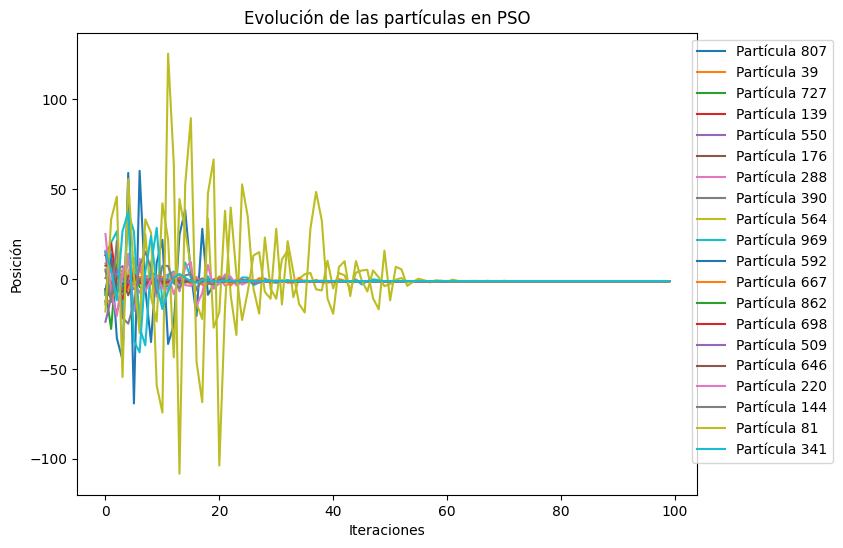

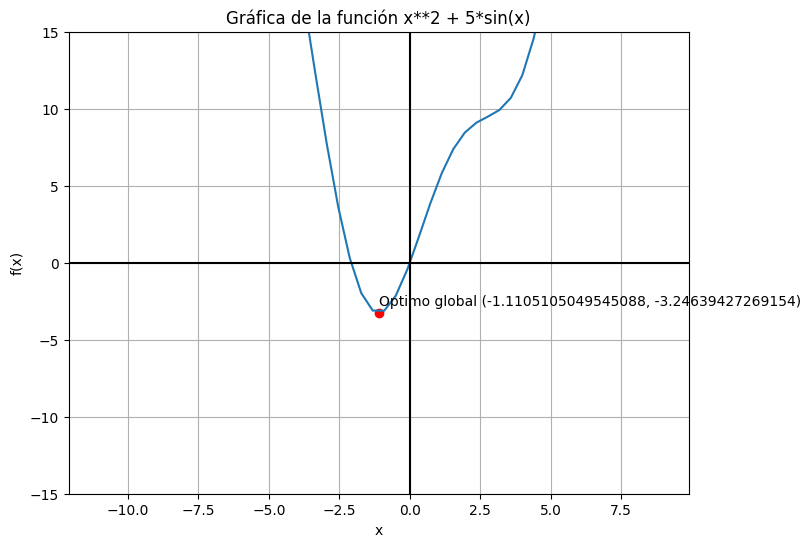

Mejor posición encontrada: -1.1105105049545088
Valor óptimo: -3.24639427269154


In [5]:
import random
from sympy import symbols
from sympy import lambdify
from sympy import sympify
import matplotlib.pyplot as plt
import numpy as np

# Clase para representar una partícula en el enjambre
class Particle:
    def __init__(self, initial_position):
        self.position = initial_position
        self.velocity = random.uniform(-1, 1)
        self.best_position = self.position

def Solution():
    print("")
    x = symbols('x')
    fn = sympify(input('Ingresa la función objetivo: '))
    f = lambdify(x, fn)
    obj = input("¿Cuál es el objetivo de la función (Max - Min)?: ")
    num_particles = int(input("¿Cuántas particulas deseas usar para el problema?: "))
    max_iterations = int(input("¿Cuántas iteraciones desea realizar?: "))
    xl = float(input("Ingresa el valor menor del rango de posición inicial de las particulas: "))
    xu = float(input("Ingresa el valor mayor del rango de posición inicial de las particulas: "))
    c1 = 2.0  # Factor de aprendizaje cognitivo
    c2 = 2.0  # Factor de aprendizaje social
    inertia = 0.5  # Factor de inercia
    swarm = [Particle(random.uniform(xl, xu)) for _ in range(num_particles)]
    global_best_position = PSO(max_iterations, swarm, inertia, c1, c2, f, obj, num_particles, xl, xu, fn)
    print("Mejor posición encontrada:", global_best_position)
    print("Valor óptimo:", f(global_best_position))

def PSO(max_iterations, swarm, inertia, c1, c2, f, obj, num_particles, xl, xu, fn):
    particle_positions_history = [[] for _ in range(num_particles)]
    if obj == "Max" or obj == "max":
        global_best_position = max(swarm, key=lambda particle: f(particle.position)).position
    if obj == "Min" or obj == "min":
        global_best_position = min(swarm, key=lambda particle: f(particle.position)).position
    for iteration in range(max_iterations):
        for i, particle in enumerate(swarm):
            # Actualizar la velocidad y posición de la partícula
            particle.velocity = inertia * particle.velocity + c1 * random.random() * (particle.best_position - particle.position) + c2 * random.random() * (global_best_position - particle.position)
            particle.position += particle.velocity
            particle_positions_history[i].append(particle.position)
            if obj == "Max" or obj == "max":
                # Actualizar la mejor posición personal de la partícula
                if f(particle.position) > f(particle.best_position):
                    particle.best_position = particle.position
                # Actualizar la mejor posición global del enjambre
                if f(particle.position) > f(global_best_position):
                    global_best_position = particle.position
            if obj == "Min" or obj == "min":
                # Actualizar la mejor posición personal de la partícula
                if f(particle.position) < f(particle.best_position):
                    particle.best_position = particle.position
                # Actualizar la mejor posición global del enjambre
                if f(particle.position) < f(global_best_position):
                    global_best_position = particle.position
    num_particles_to_plot = 20
    particles_to_plot_indices = random.sample(range(num_particles), num_particles_to_plot)
    plt.figure(figsize=(8, 6))
    for i in particles_to_plot_indices:
        plt.plot(range(max_iterations), particle_positions_history[i], label=f'Partícula {i + 1}')
    plt.xlabel('Iteraciones')
    plt.ylabel('Posición')
    plt.title('Evolución de las partículas en PSO')
    plt.legend(loc='upper left', bbox_to_anchor=(0.98, 1))
    plt.show()
    print(" ")
    plt.figure(figsize=(8, 6))
    xpts = np.linspace(global_best_position - 10, global_best_position + 10)
    plt.plot(xpts, f(xpts))
    plt.title("Gráfica de la función " + str(fn))
    plt.axhline(color="black")
    plt.axvline(color="black")
    plt.scatter(global_best_position, f(global_best_position), c="red")
    plt.annotate("Optimo global " + str((global_best_position, f(global_best_position))), xy=(global_best_position, f(global_best_position)+0.5))
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True, which='both')
    plt.ylim([-15, 15])
    plt.show()

    return global_best_position

Solution()
